# XTGEO Library in RMS

## Grid property Description

A grid property is a 3darray (masked)

The examples will be done on RMS for simplicity.
>import xtgeo  
>_#import (transfer) data from RMS to XTGeo, project can be a path to a rms project if used outside_   
>myporo = xtgeo.gridproperty_from_roxar(project, "Geomodel", "Por")  
>_#now I want to limit porosity to 0.35 for values above 0.35:_  
>myporo.values[myporo.values > 0.35] = 0.35  
>_#store to another icon_  
>poro.to_roxar(project, "Geomodel", "PorNew")  
>
>
>
>
The grid is existing in rms and xtgeo pakage allows to get any properties.   
A specific grid will be used, to touch upon masked array concept.  
Xtgeo will be compared to rmsapi to illustrated the strength of it.

# How to use xtgeo to get a grid property

**_Drogon will be used as an example_**

In [1]:
import sys
print(sys.executable)

/prog/res/komodo/2025.03.06-py311-rhel8/root/bin/python


In [2]:
import xtgeo
import sys

#--------------in rms-------------
# myproject = project #(already reference in the rmsapi)
#--------------in rms-------------

# ---------- Below required only for this notebook, not required inside rms
myproject = "/private/lgal/drogon_20240815_10-06/resmod/ff/24.3.1/rms/model/drogon.rms14.2.2"
rox = xtgeo.RoxUtils(myproject)
print(f'{rox} \n\n\n')


print('Warning: to run only once.\n It will create issues of already open project if run twice')

AttributeError: 'NoneType' object has no attribute '__version__'

In [22]:
print(rox.project.name) 
print(rox.project.company)
print(rox.project.country)
print(rox.project.site)
print(rox.project.description)
print(rox.project.file_version)
print(f'Project file name: {rox.project.filename}')
print(f'Project units: {rox.project.project_units}')
print(f'SEED: {rox.project.seed}')
print(f'Number of realizations: {rox.project.realisation_count}')
print(f'Current realization is: {rox.project.current_realisation}')
print(f'Project import/export Units: {rox.project.export_import_units}')
print(rox.project.history[-1]) # list item
print(rox.project.history[-1].date)
print(rox.project.history[-1].time)
print(rox.project.history[-1].operation)
print(rox.project.history[-1].release)
print(rox.project.history[-1].user)

Drogon Synthetic project
Equinor: opensource
Norway
All offices
Drogon Synthetic project
2023.0000
Project file name: /private/lgal/drogon_20240815_10-06/resmod/ff/24.3.1/rms/model/drogon.rms14.2.2
Project units: metric
SEED: 1000
Number of realizations: 1
Current realization is: 0
Project import/export Units: metric
HistoryItem("20.03.2025", "15:28", "lgal", "V14.2.1", "Save")
20.03.2025
15:28
Save
V14.2.1
lgal


In [4]:
# ---------- Above required only for this notebook, not required inside rms

gridname = 'Geogrid'

ZONE = 'Zone'
REGION = 'Region'
PORO = 'PHIT'

zone = xtgeo.gridproperty_from_roxar(rox.project, gridname, ZONE)  # zone = xtgeo.gridproperty_from_roxar(myproject, gridname, ZONE) inside RMS
#region = xtgeo.gridproperty_from_roxar(project, gridname, REGION)
#poro = xtgeo.gridproperty_from_roxar(project, gridname, PORO)
print('\033[1mDiscrete property: \033[0m \n')
print(f'{zone} \n')

print('\033[1mAvailable functions for discrete properties:\033[0m \n')
print(dir(zone))

print('\n\n\033[1mLegend for discrete properties, stored as a dictionnary:\033[0m \n')
print(zone.codes)
print(f'How many entry in the legend dictionnary: {zone.ncodes}')
print(f'Property name: {zone.name}')
print(f'  Number of columns: {zone.ncol}\n  Number of rows: {zone.nrow}\n  Number of layerd: {zone.nlay}\n  Number of Cells (col*row*lay): {zone.ncol*zone.nrow*zone.nlay}')
print(f'  Number of cells directly from attribute: {zone.ntotal}\n')
print(zone.roxar_dtype,'\n')
print(f'\n\n\033[1mWhat is the type of the attribute values:\033[0m {type(zone.values)}\n')
print(f' printing values:\n\n {zone.values} \n\n')
print(f' \033[1mDimension for the zone.values array:\033[0m {zone.values.ndim}\n')
print(f' \033[1mShape for the zone.values array:\033[0m {zone.values.shape}\n')
#print(zone.values.mask)

Discrete property:  

Description of GridProperty instance
Object ID                                => 140204845018448
Name                                     => Zone
Date                                     => None
File source                              => None
Discrete status                          => True
Codes                                    => {1: 'Valysar', 2: 'Therys', 3: 'Volon'}
Shape: NCOL, NROW, NLAY                  => 92  146  69
Values                                   => [1 1 1 ... 3 3 3]  int32
Values, mean, stdev, minimum, maximum    => 1.896018577932594  0.8402724121790813  1  3
Roxar datatype                           => uint16
Minimum memory usage of array (GB)       => 0.0034526288509368896

Available functions for discrete properties: 

['__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__m

# How to read the 3darray for rms

For a grid property using xtgeo is a 3darray defined as follow:  

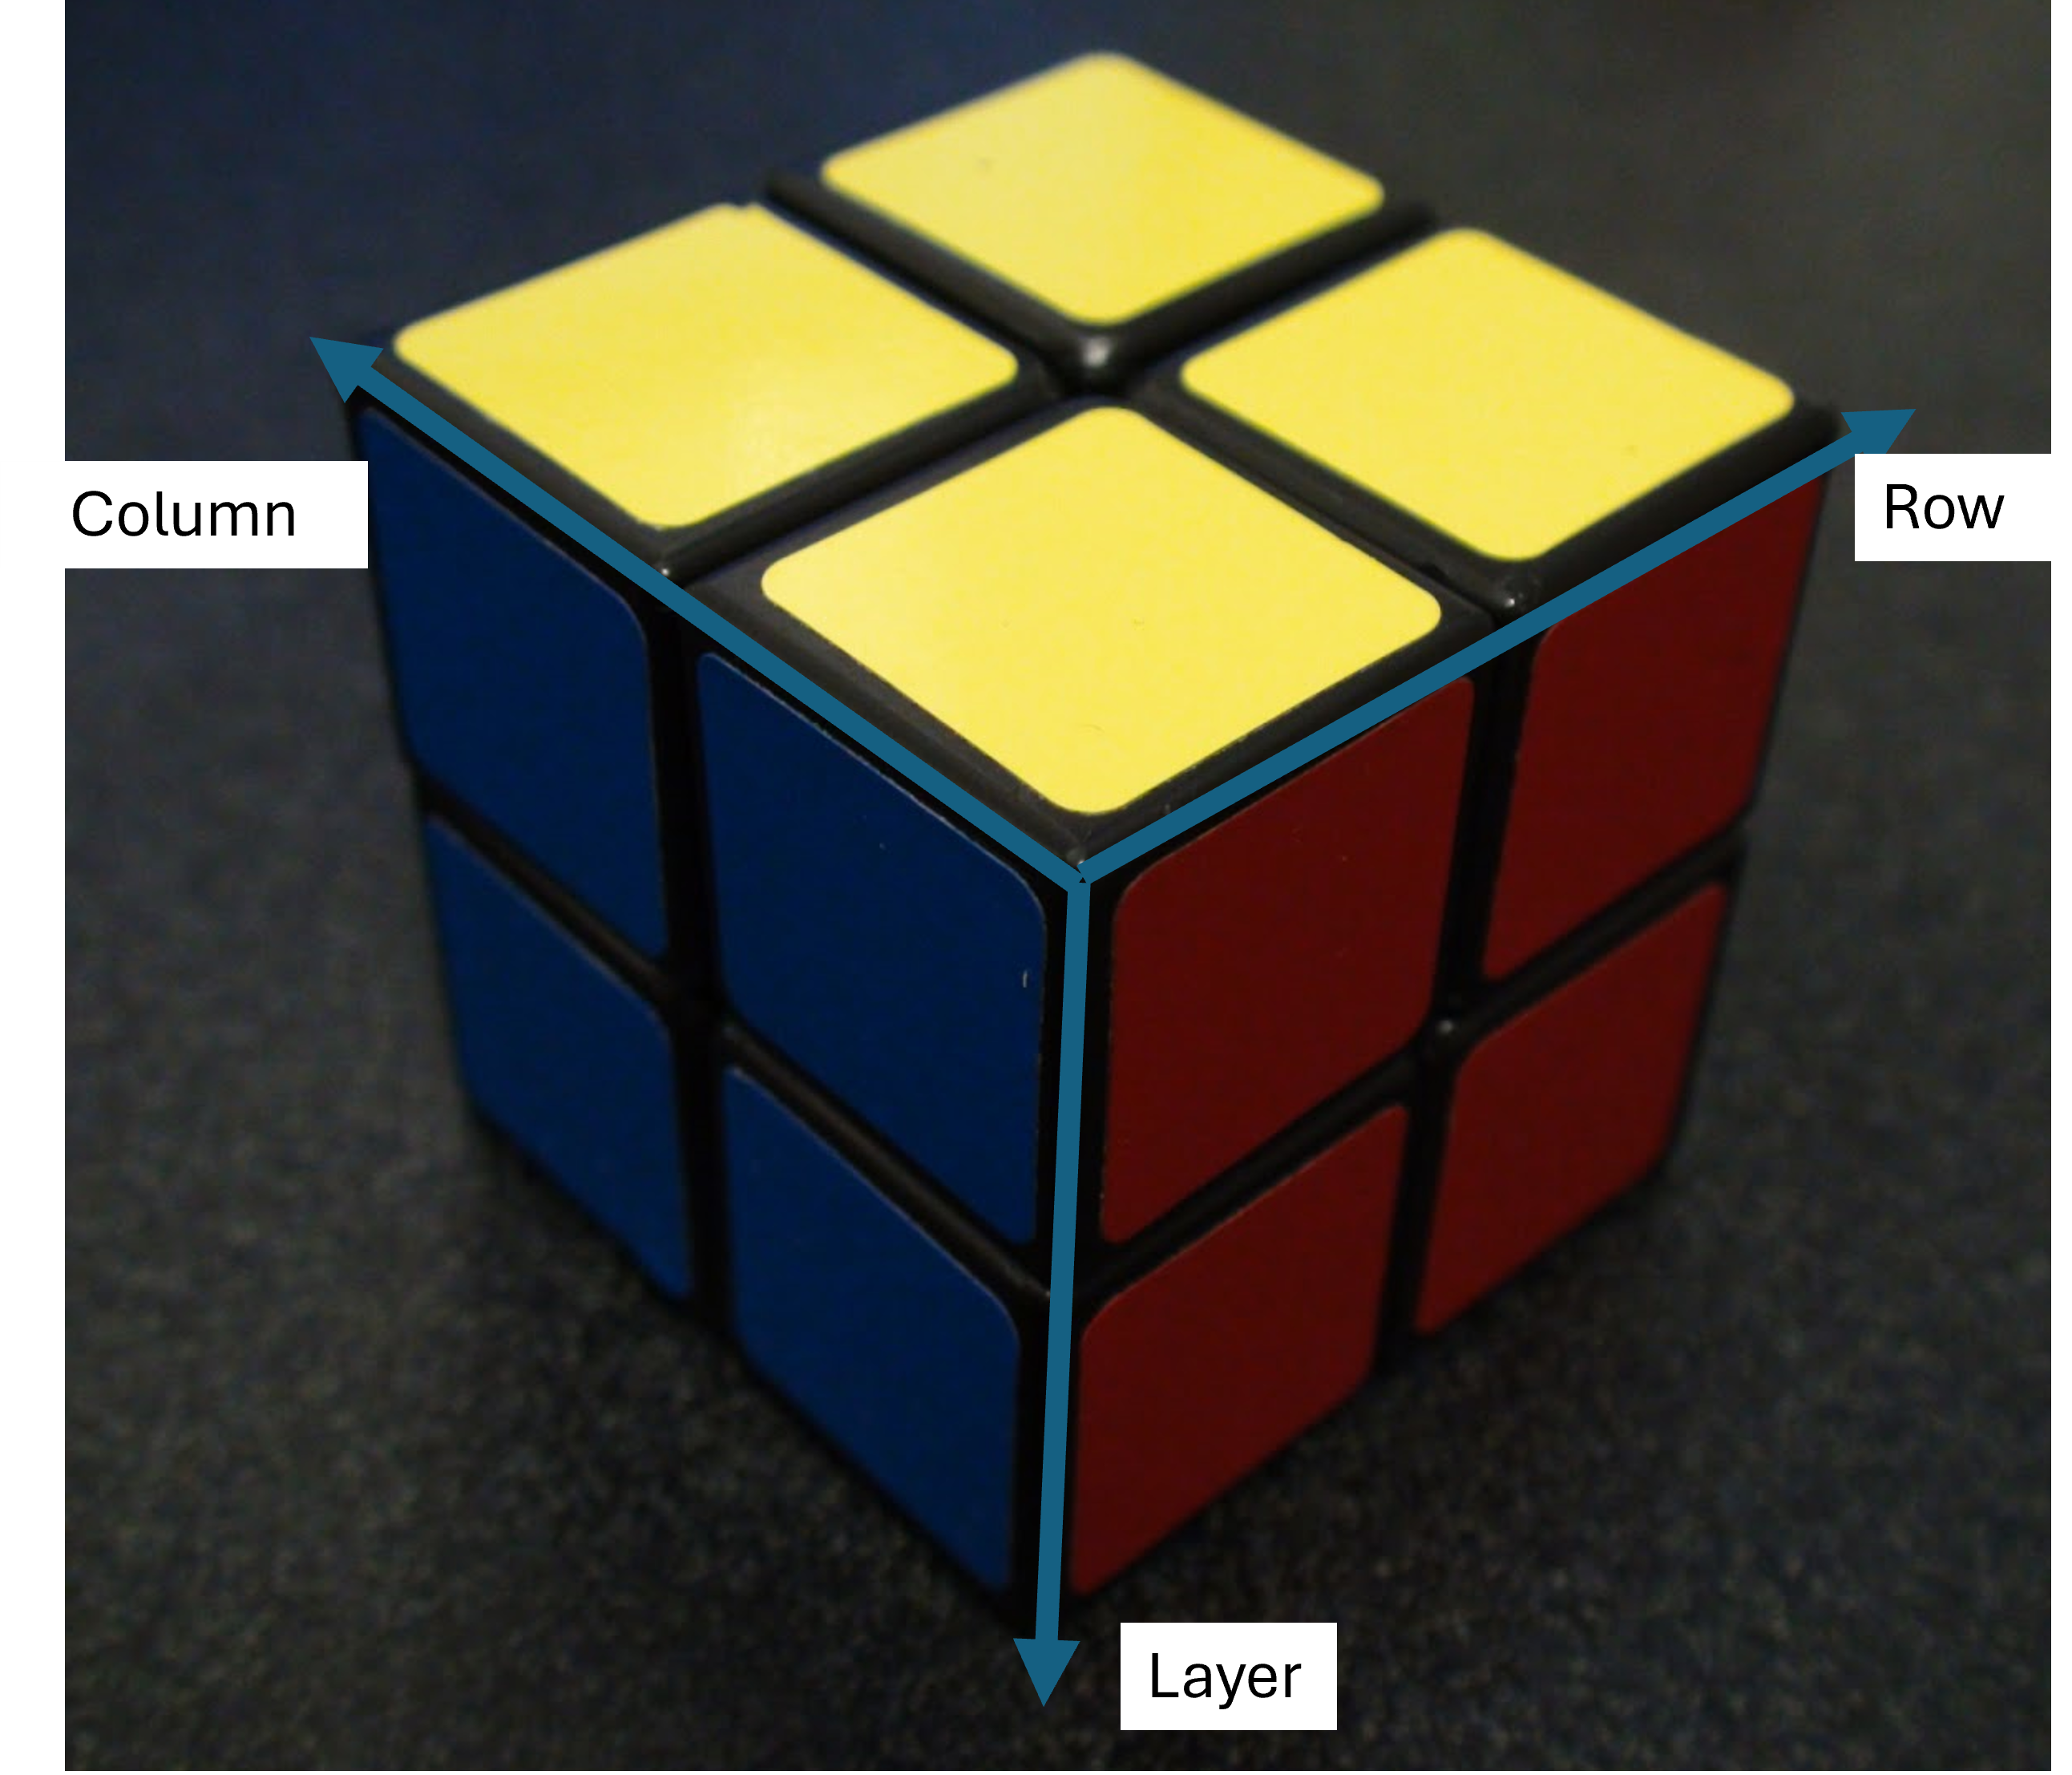


[[[col1_row1_layer1  col1_row1_layer2]  
&nbsp;&nbsp;   [col1_row2_layer1  col1_row2_layer2]]  
&nbsp; [[col2_row1_layer1  col2_row1_layer2]  
&nbsp;&nbsp;    [col2_row2_layer1  col2_row2_layer2]]]  


Col1 Row 1 [layer 1 to layer max]  

Col1 Rowmax [layer 1 to layer max]  

Colmax Rowmax[layer 1 to layer max]  



print('reading the values for columns, rows and layers for a simple 10x10x10 regular grid.)


print(col.values)   
[[[ 1  1  1  1  1]
  [ 1  1  1  1  1]
  [ 1  1  1  1  1]
  [ 1  1  1  1  1]
  [ 1  1  1  1  1]
  [ 1  1  1  1  1]
  [ 1  1  1  1  1]
  [ 1  1  1  1  1]
  [ 1  1  1  1  1]
  [ 1  1  1  1  1]]

 [[ 2  2  2  2  2]
  [ 2  2  2  2  2]
  [ 2  2  2  2  2]
  [ 2  2  2  2  2]
  [ 2  2  2  2  2]
  [ 2  2  2  2  2]
  [ 2  2  2  2  2]
  [ 2  2  2  2  2]
  [ 2  2  2  2  2]
  [ 2  2  2  2  2]]

 [[ 3  3  3  3  3]
  [ 3  3  3  3  3]
  [ 3  3  3  3  3]
  [ 3  3  3  3  3]
  [ 3  3  3  3  3]
  [ 3  3  3  3  3]
  [ 3  3  3  3  3]
  [ 3  3  3  3  3]
  [ 3  3  3  3  3]
  [ 3  3  3  3  3]]

 [[ 4  4  4  4  4]
  [ 4  4  4  4  4]
  [ 4  4  4  4  4]
  [ 4  4  4  4  4]
  [ 4  4  4  4  4]
  [ 4  4  4  4  4]
  [ 4  4  4  4  4]
  [ 4  4  4  4  4]
  [ 4  4  4  4  4]
  [ 4  4  4  4  4]]

 [[ 5  5  5  5  5]
  [ 5  5  5  5  5]
  [ 5  5  5  5  5]
  [ 5  5  5  5  5]
  [ 5  5  5  5  5]
  [ 5  5  5  5  5]
  [ 5  5  5  5  5]
  [ 5  5  5  5  5]
  [ 5  5  5  5  5]
  [ 5  5  5  5  5]]

 [[ 6  6  6  6  6]
  [ 6  6  6  6  6]
  [ 6  6  6  6  6]
  [ 6  6  6  6  6]
  [ 6  6  6  6  6]
  [ 6  6  6  6  6]
  [ 6  6  6  6  6]
  [ 6  6  6  6  6]
  [ 6  6  6  6  6]
  [ 6  6  6  6  6]]

 [[ 7  7  7  7  7]
  [ 7  7  7  7  7]
  [ 7  7  7  7  7]
  [ 7  7  7  7  7]
  [ 7  7  7  7  7]
  [ 7  7  7  7  7]
  [ 7  7  7  7  7]
  [ 7  7  7  7  7]
  [ 7  7  7  7  7]
  [ 7  7  7  7  7]]

 [[ 8  8  8  8  8]
  [ 8  8  8  8  8]
  [ 8  8  8  8  8]
  [ 8  8  8  8  8]
  [ 8  8  8  8  8]
  [ 8  8  8  8  8]
  [ 8  8  8  8  8]
  [ 8  8  8  8  8]
  [ 8  8  8  8  8]
  [ 8  8  8  8  8]]

 [[ 9  9  9  9  9]
  [ 9  9  9  9  9]
  [ 9  9  9  9  9]
  [ 9  9  9  9  9]
  [ 9  9  9  9  9]
  [ 9  9  9  9  9]
  [ 9  9  9  9  9]
  [ 9  9  9  9  9]
  [ 9  9  9  9  9]
  [ 9  9  9  9  9]]

 [[10 10 10 10 10]
  [10 10 10 10 10]
  [10 10 10 10 10]
  [10 10 10 10 10]
  [10 10 10 10 10]
  [10 10 10 10 10]
  [10 10 10 10 10]
  [10 10 10 10 10]
  [10 10 10 10 10]
  [10 10 10 10 10]]]
   
print(row.values)   

[[[ 1  1  1  1  1]
  [ 2  2  2  2  2]
  [ 3  3  3  3  3]
  [ 4  4  4  4  4]
  [ 5  5  5  5  5]
  [ 6  6  6  6  6]
  [ 7  7  7  7  7]
  [ 8  8  8  8  8]
  [ 9  9  9  9  9]
  [10 10 10 10 10]]

 [[ 1  1  1  1  1]
  [ 2  2  2  2  2]
  [ 3  3  3  3  3]
  [ 4  4  4  4  4]
  [ 5  5  5  5  5]
  [ 6  6  6  6  6]
  [ 7  7  7  7  7]
  [ 8  8  8  8  8]
  [ 9  9  9  9  9]
  [10 10 10 10 10]]

 [[ 1  1  1  1  1]
  [ 2  2  2  2  2]
  [ 3  3  3  3  3]
  [ 4  4  4  4  4]
  [ 5  5  5  5  5]
  [ 6  6  6  6  6]
  [ 7  7  7  7  7]
  [ 8  8  8  8  8]
  [ 9  9  9  9  9]
  [10 10 10 10 10]]

 [[ 1  1  1  1  1]
  [ 2  2  2  2  2]
  [ 3  3  3  3  3]
  [ 4  4  4  4  4]
  [ 5  5  5  5  5]
  [ 6  6  6  6  6]
  [ 7  7  7  7  7]
  [ 8  8  8  8  8]
  [ 9  9  9  9  9]
  [10 10 10 10 10]]

 [[ 1  1  1  1  1]
  [ 2  2  2  2  2]
  [ 3  3  3  3  3]
  [ 4  4  4  4  4]
  [ 5  5  5  5  5]
  [ 6  6  6  6  6]
  [ 7  7  7  7  7]
  [ 8  8  8  8  8]
  [ 9  9  9  9  9]
  [10 10 10 10 10]]

 [[ 1  1  1  1  1]
  [ 2  2  2  2  2]
  [ 3  3  3  3  3]
  [ 4  4  4  4  4]
  [ 5  5  5  5  5]
  [ 6  6  6  6  6]
  [ 7  7  7  7  7]
  [ 8  8  8  8  8]
  [ 9  9  9  9  9]
  [10 10 10 10 10]]

 [[ 1  1  1  1  1]
  [ 2  2  2  2  2]
  [ 3  3  3  3  3]
  [ 4  4  4  4  4]
  [ 5  5  5  5  5]
  [ 6  6  6  6  6]
  [ 7  7  7  7  7]
  [ 8  8  8  8  8]
  [ 9  9  9  9  9]
  [10 10 10 10 10]]

 [[ 1  1  1  1  1]
  [ 2  2  2  2  2]
  [ 3  3  3  3  3]
  [ 4  4  4  4  4]
  [ 5  5  5  5  5]
  [ 6  6  6  6  6]
  [ 7  7  7  7  7]
  [ 8  8  8  8  8]
  [ 9  9  9  9  9]
  [10 10 10 10 10]]

 [[ 1  1  1  1  1]
  [ 2  2  2  2  2]
  [ 3  3  3  3  3]
  [ 4  4  4  4  4]
  [ 5  5  5  5  5]
  [ 6  6  6  6  6]
  [ 7  7  7  7  7]
  [ 8  8  8  8  8]
  [ 9  9  9  9  9]
  [10 10 10 10 10]]

 [[ 1  1  1  1  1]
  [ 2  2  2  2  2]
  [ 3  3  3  3  3]
  [ 4  4  4  4  4]
  [ 5  5  5  5  5]
  [ 6  6  6  6  6]
  [ 7  7  7  7  7]
  [ 8  8  8  8  8]
  [ 9  9  9  9  9]
  [10 10 10 10 10]]]

print(layer.values)    

[[[1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]]

 [[1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]]

 [[1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]]

 [[1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]]

 [[1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]]

 [[1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]]

 [[1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]]

 [[1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]]

 [[1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]]

 [[1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]]]


# Continuous property
example for porosity

In [5]:
poro=xtgeo.gridproperty_from_roxar(rox.project, gridname, PORO)
print(poro)

Description of GridProperty instance
Object ID                                => 140204834053712
Name                                     => PHIT
Date                                     => None
File source                              => None
Discrete status                          => False
Codes                                    => {}
Shape: NCOL, NROW, NLAY                  => 92  146  69
Values                                   => [0.09818728268146515 0.11209386587142944 0.11560061573982239 ... 0.0 0.0
 0.2351069152355194]  float64
Values, mean, stdev, minimum, maximum    => 0.16166813482962142  0.1004015929687986  0.0  0.3745798170566559
Roxar datatype                           => float32
Minimum memory usage of array (GB)       => 0.006905257701873779


In [6]:
print('Creating a duplicate of porosity\n\n')
poro_edit = poro.copy()

Creating a duplicate of porosity




In [7]:
print('3darray of porosity values\n\n')
print(poro.values)

3darray of porosity values


[[[0.09818728268146515 0.11209386587142944 0.11560061573982239 ...
   0.2329280972480774 0.20622555911540985 0.22682365775108337]
  [0.09680217504501343 0.10768195241689682 0.11821462213993073 ...
   0.2400820553302765 0.21429577469825745 0.23755928874015808]
  [0.10047881305217743 0.1091478019952774 0.2712482511997223 ... -- --
   --]
  ...
  [0.26240479946136475 0.27552133798599243 0.26686587929725647 ...
   0.24986891448497772 0.25875312089920044 0.25695860385894775]
  [0.2601136565208435 0.26908937096595764 0.2770383656024933 ...
   0.25018781423568726 0.25080153346061707 0.22734884917736053]
  [0.2192874252796173 0.254097580909729 0.25193464756011963 ...
   0.24834203720092773 0.2544693052768707 0.24424923956394196]]

 [[0.09567543119192123 0.11097400635480881 0.11495600640773773 ...
   0.21926313638687134 0.2415040284395218 0.23699019849300385]
  [0.09553886204957962 0.10729899257421494 0.11232052743434906 ...
   0.2313036173582077 0.22986383736133575

In [8]:
print('\033[1mFiltering data for edition of property\033[0m\n\n')
print(poro.values[zone.values == 2],'\n\n')
print('\033[1mDimension of the aray is changed during the filtering process\033[0m\n\n')
print(poro.values[zone.values == 2].ndim)

Filtering data for edition of property


[0.0 0.3112085163593292 0.31351932883262634 ... 0.3188035488128662 0.0
 0.3233855068683624] 


Dimension of the aray is changed during the filtering process


1


# Array type in RMS

In [9]:
print(type(poro.values))

<class 'numpy.ma.core.MaskedArray'>


# What is a masked array

Numpy: https://numpy.org/doc/2.2/index.html  
Numpy masked array documentation: https://numpy.org/doc/stable/reference/maskedarray.generic.html   

> In many circumstances, datasets can be incomplete or tainted by the presence of invalid data. For example, a sensor may have failed to record a data, or recorded an invalid value. The numpy.ma module provides a convenient way to address this issue, by introducing masked arrays.

>A masked array is the combination of a standard numpy.ndarray and a mask. A mask is either nomask, indicating that no value of the associated array is invalid, or an array of booleans that determines for each element of the associated array whether the value is valid or not. When an element of the mask is False, the corresponding element of the associated array is valid and is said to be unmasked. When an element of the mask is True, the corresponding element of the associated array is said to be masked (invalid).

>The package ensures that masked entries are not used in computations
   
In rms, we do not have sensor error of measurement error.    
The grid are corner point grid. Their geometry is defined by Ncol, Nrow, Nlay.    
Although we may not see it because of erosions (collapsed fo , thickess = 0).. , the cells needs to be defined as I,J, K coordinates.
However, the value inside has no meaning since the cells is only virtually existing => it is considered as a masked values i.e. a non value.    
In the property.values it appears as --.    
A mask property is used to flag which values are maske (False: the cell is existing and is defined, True: the cell is not defined)



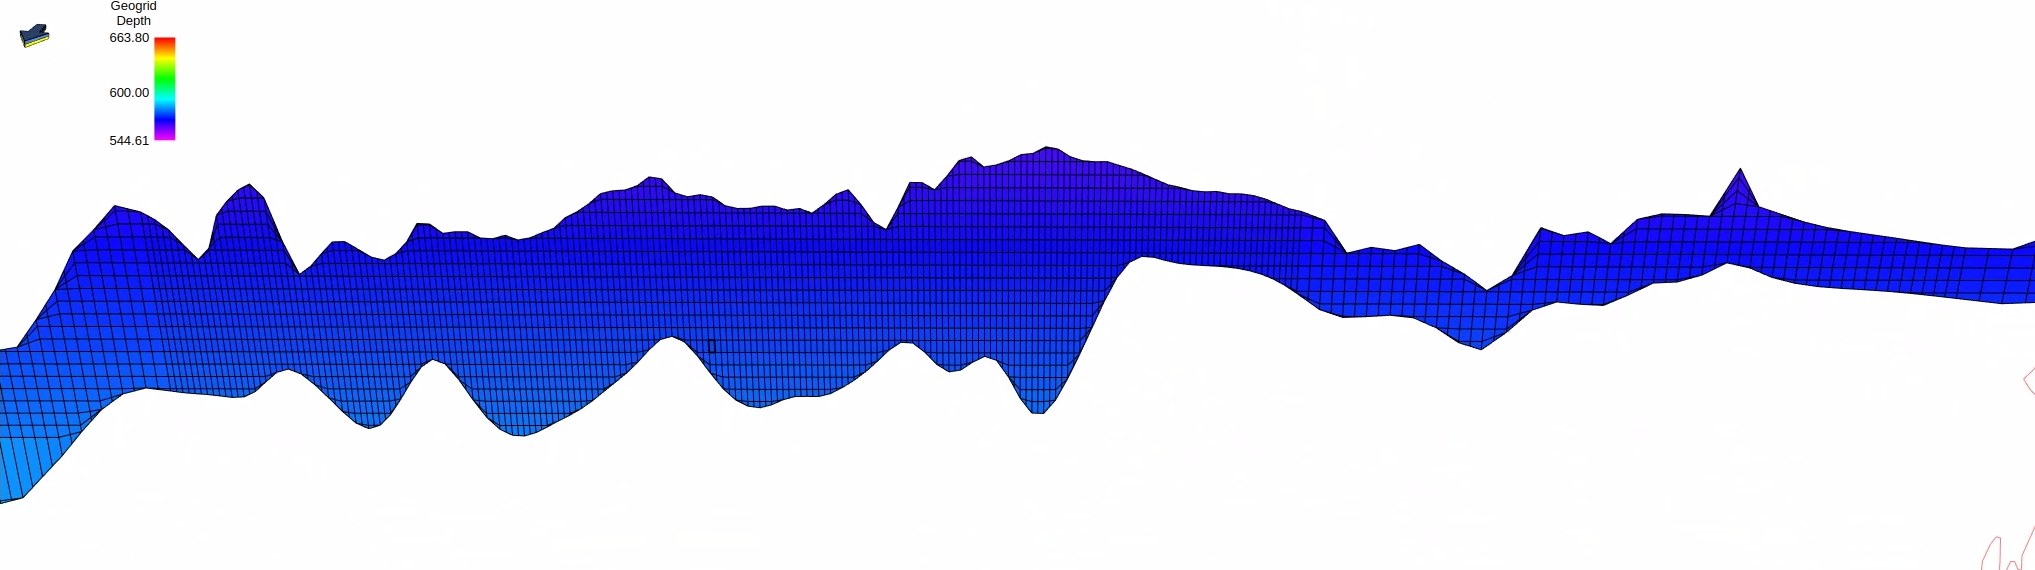'

RMS: A grid is a box, even if the cells do not appear, they are physically existing => what to do with the hidden cells : masked array

In [10]:
print('Mask for the property\n\n')
print(poro.values.mask)

Mask for the property


[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ...  True  True  True]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ...  True  True  True]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False F

In [11]:
print('Change the value of a masked values\nDoing it on the porosity duplicate\n\n')
poro_edit.values[poro_edit.values.mask == True] = -999
print(poro_edit.values)


Change the value of a masked values
Doing it on the porosity duplicate


[[[0.09818728268146515 0.11209386587142944 0.11560061573982239 ...
   0.2329280972480774 0.20622555911540985 0.22682365775108337]
  [0.09680217504501343 0.10768195241689682 0.11821462213993073 ...
   0.2400820553302765 0.21429577469825745 0.23755928874015808]
  [0.10047881305217743 0.1091478019952774 0.2712482511997223 ... -999.0
   -999.0 -999.0]
  ...
  [0.26240479946136475 0.27552133798599243 0.26686587929725647 ...
   0.24986891448497772 0.25875312089920044 0.25695860385894775]
  [0.2601136565208435 0.26908937096595764 0.2770383656024933 ...
   0.25018781423568726 0.25080153346061707 0.22734884917736053]
  [0.2192874252796173 0.254097580909729 0.25193464756011963 ...
   0.24834203720092773 0.2544693052768707 0.24424923956394196]]

 [[0.09567543119192123 0.11097400635480881 0.11495600640773773 ...
   0.21926313638687134 0.2415040284395218 0.23699019849300385]
  [0.09553886204957962 0.10729899257421494 0.1123205

In [12]:
print('Notice how the mask is changed in the process\nif a values should replace the mask,\nit is important to make something that will be very specific to it\n\n')
print(poro_edit.values.mask)

Notice how the mask is changed in the process
if a values should replace the mask,
it is important to make something that will be very specific to it


[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... F

In [13]:
print('The mask for the initial property is unchanged\nIt can be used to set the mask again on the edited property\n\n')
print(poro.values.mask)

The mask for the initial property is unchanged
It can be used to set the mask again on the edited property


[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ...  True  True  True]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ...  True  True  True]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... 

In [14]:
print('We need to work on the masked array to set it to True or False')
poro_edit.values.mask[poro.values.mask==True] = True
print(poro_edit.values)

We need to work on the masked array to set it to True or False
[[[0.09818728268146515 0.11209386587142944 0.11560061573982239 ...
   0.2329280972480774 0.20622555911540985 0.22682365775108337]
  [0.09680217504501343 0.10768195241689682 0.11821462213993073 ...
   0.2400820553302765 0.21429577469825745 0.23755928874015808]
  [0.10047881305217743 0.1091478019952774 0.2712482511997223 ... -- --
   --]
  ...
  [0.26240479946136475 0.27552133798599243 0.26686587929725647 ...
   0.24986891448497772 0.25875312089920044 0.25695860385894775]
  [0.2601136565208435 0.26908937096595764 0.2770383656024933 ...
   0.25018781423568726 0.25080153346061707 0.22734884917736053]
  [0.2192874252796173 0.254097580909729 0.25193464756011963 ...
   0.24834203720092773 0.2544693052768707 0.24424923956394196]]

 [[0.09567543119192123 0.11097400635480881 0.11495600640773773 ...
   0.21926313638687134 0.2415040284395218 0.23699019849300385]
  [0.09553886204957962 0.10729899257421494 0.11232052743434906 ...
   0.23

# So what do we do with that

In [15]:
print('Printing all layers of first column and first row of the grid\n\n')
print(poro.values[0,0,:])
print(poro.values)

Printing all layers of first column and first row of the grid


[0.09818728268146515 0.11209386587142944 0.11560061573982239
 0.1195995956659317 0.09018708765506744 0.08511167019605637
 0.26504844427108765 0.269059956073761 0.2638952136039734
 0.28598740696907043 0.27126544713974 0.26208627223968506
 0.2698652446269989 0.24837666749954224 0.2666810154914856
 0.2737090587615967 0.09622852504253387 0.09771336615085602
 0.11159662902355194 0.0 0.0 0.3112085163593292 0.31351932883262634
 0.2657433748245239 0.2471754252910614 0.0 0.24778172373771667
 0.08181887865066528 0.1030227541923523 0.13183550536632538
 0.13709098100662231 0.14956015348434448 0.128253772854805
 0.113929882645607 0.09699766337871552 0.06894487887620926
 0.0981813296675682 0.07940158247947693 0.0 0.08032820373773575
 0.0702119693160057 0.09245844185352325 0.07367357611656189
 0.10426028817892075 0.1312018632888794 0.0 -- -- -- -- -- -- -- -- 0.0
 0.06556319445371628 0.07153432816267014 0.0 0.21689294278621674
 0.2291502

In [16]:
print('trying to sum in zone 2 layer i and layer i+1')
for k in range(poro_edit.nlay-1):
    poro_edit.values[:,:,k] +=  poro.values[:,:,k+1]
print(poro_edit.values)
print('\n\-----------------------------------------------------------\n\n')
print(poro.values)
    

trying to sum in zone 2 layer i and layer i+1
[[[0.2102811485528946 0.22769448161125183 0.2352002114057541 ...
   0.43915365636348724 0.4330492168664932 0.22682365775108337]
  [0.20448412746191025 0.22589657455682755 0.23594607412815094 ...
   0.45437783002853394 0.4518550634384155 0.23755928874015808]
  [0.20962661504745483 0.3803960531949997 0.3945181965827942 ... -- --
   --]
  ...
  [0.5379261374473572 0.5423872172832489 0.5220757722854614 ...
   0.5086220353841782 0.5157117247581482 0.25695860385894775]
  [0.5292030274868011 0.5461277365684509 0.5174255520105362 ...
   0.5009893476963043 0.4781503826379776 0.22734884917736053]
  [0.4733850061893463 0.5060322284698486 0.49818892776966095 ...
   0.5028113424777985 0.4987185448408127 0.24424923956394196]]

 [[0.20664943754673004 0.22593001276254654 0.23524610698223114 ...
   0.4607671648263931 0.47849422693252563 0.23699019849300385]
  [0.20283785462379456 0.219619520008564 0.23281680792570114 ...
   0.46116745471954346 0.45910824835

In [18]:
print('trying to sum in zone 2 layer i and layer i+1\n')

poro.values[poro.values.mask == True] = -999
for k in range(poro_edit.nlay-1):
    poro_edit.values[:,:,k] +=  poro.values[:,:,k+1]
print(poro_edit)


trying to sum in zone 2 layer i and layer i+1

we need to convert the masked first for both properties


Description of GridProperty instance
Object ID                                => 140204834099408
Name                                     => PHIT
Date                                     => None
File source                              => None
Discrete status                          => False
Codes                                    => {}
Shape: NCOL, NROW, NLAY                  => 92  146  69
Values                                   => [0.4344688802957535 0.4588957130908966 0.4743994027376175 ... 0.0
 0.7053207457065582 0.2351069152355194]  float64
Values, mean, stdev, minimum, maximum    => 0.6451042402313591  0.3565813749677474  0.0  1.4707697927951813
Roxar datatype                           => float32
Minimum memory usage of array (GB)       => 0.006905257701873779


In [7]:
#need to close the project to work on it and relaunch this window
rox.project.close()